In [ ]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import axes
import plotly.express as px
import matplotlib.colors as mcolors

In [ ]:
# Read the given file and view sample records
df = pd.read_csv("/content/Jio - Jio Prepaid Planes.csv")
df.head()

,Days,Price,Price/Day,For 365 Days,Profit per customer,From 400 Million users,Data_per_day
0,28,209,7.464286,2724.464286,5.214286,2085.714286,1.0
1,24,179,7.458333,2722.291667,3.041667,1216.666667,1.0
2,20,149,7.450000,2719.250000,0.000000,0.000000,1.0
3,336,2545,7.574405,2764.657738,0.000000,0.000000,1.5
4,84,666,7.928571,2893.928571,129.270833,51708.333330,1.5


In [ ]:
df.describe()

,Days,Price,Price/Day,For 365 Days,Profit per customer,From 400 Million users,Data_per_day
count,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000
mean,76.687500,663.812500,9.306167,3396.750914,306.361219,122544.487586,1.718750
std,109.140716,845.097645,2.320658,847.040309,345.420462,138168.184724,0.604669
min,14.000000,119.000000,7.450000,2719.250000,0.000000,0.000000,1.000000
25%,23.750000,206.500000,7.809355,2850.414434,2.281250,912.500000,1.500000
50%,28.000000,279.000000,8.544643,3118.794643,294.933036,117973.214300,1.500000
75%,63.000000,566.250000,9.808036,3579.933035,388.228132,155291.252575,2.000000
max,365.000000,2879.000000,14.964286,5461.964286,1072.521739,429008.695700,3.000000


In [ ]:
df.rename(columns={"Price":"Price/month","From 400 Million users":"Profit from 400 million users"},inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Days                           16 non-null     int64  
 1   Price/month                    16 non-null     int64  
 2   Price/Day                      16 non-null     float64
 3   For 365 Days                   16 non-null     float64
 4   Profit per customer            16 non-null     float64
 5   Profit from 400 million users  16 non-null     float64
 6   Data_per_day                   16 non-null     float64
dtypes: float64(5), int64(2)
memory usage: 1.0 KB


In [ ]:
df.isnull().any()

Days                             False
Price/month                      False
Price/Day                        False
For 365 Days                     False
Profit per customer              False
Profit from 400 million users    False
Data_per_day                     False
dtype: bool

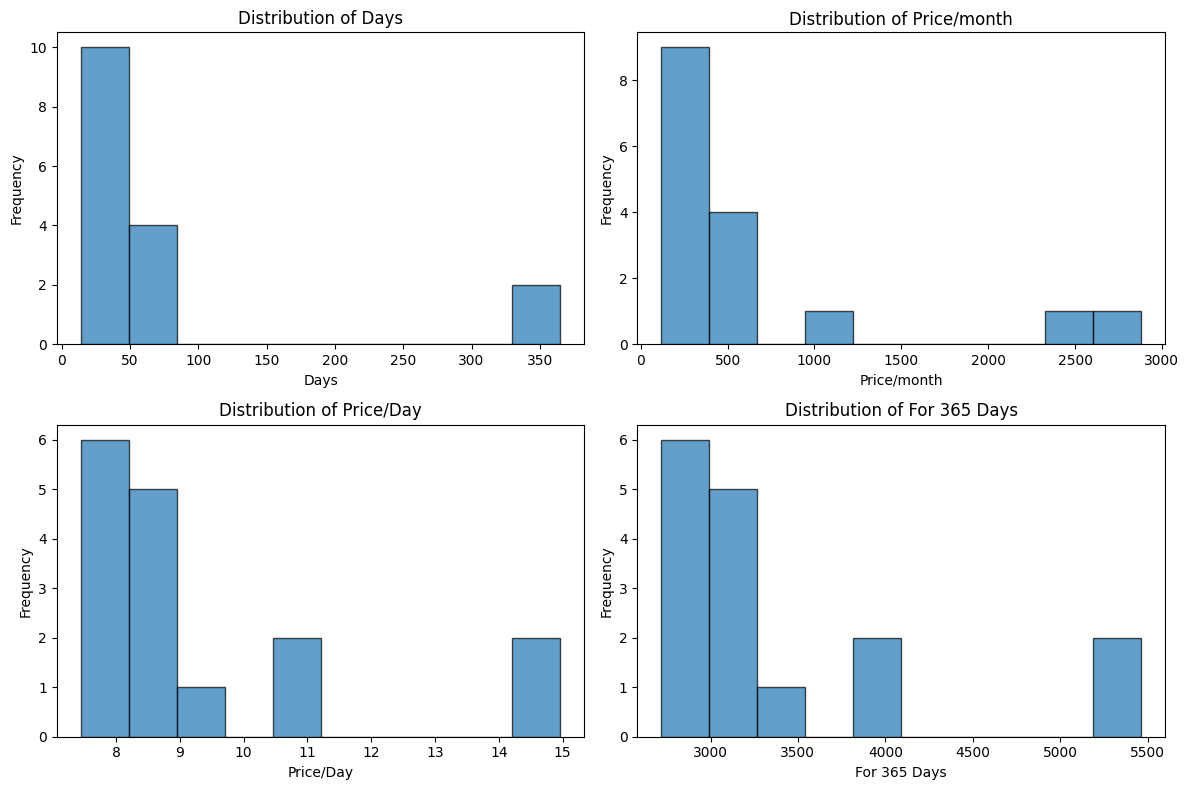

In [ ]:
# Create a figure for subplots (optional for better layout)
fig, axes = plt.subplots(2, 2, figsize=(12, 8))  # Adjust figsize for better viewing

# Distribution of numerical features (Days, Prices, Profits, Data)
axes[0, 0].hist(df["Days"], bins=10, edgecolor="black", alpha=0.7)
axes[0, 0].set_title("Distribution of Days")
axes[0, 0].set_xlabel("Days")
axes[0, 0].set_ylabel("Frequency")

axes[0, 1].hist(df["Price/month"], bins=10, edgecolor="black", alpha=0.7)
axes[0, 1].set_title("Distribution of Price/month")
axes[0, 1].set_xlabel("Price/month")
axes[0, 1].set_ylabel("Frequency")

axes[1, 0].hist(df["Price/Day"], bins=10, edgecolor="black", alpha=0.7)
axes[1, 0].set_title("Distribution of Price/Day")
axes[1, 0].set_xlabel("Price/Day")
axes[1, 0].set_ylabel("Frequency")

axes[1, 1].hist(df["For 365 Days"], bins=10, edgecolor="black", alpha=0.7)
axes[1, 1].set_title("Distribution of For 365 Days")
axes[1, 1].set_xlabel("For 365 Days")
axes[1, 1].set_ylabel("Frequency")


# Tight layout for better spacing
plt.tight_layout()

# Display the visualizations
plt.show()

<Axes: xlabel='Profit per customer', ylabel='Count'>

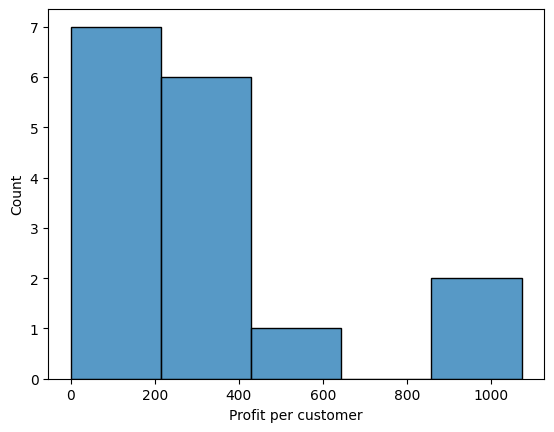

In [ ]:
sns.histplot(df['Profit per customer'])

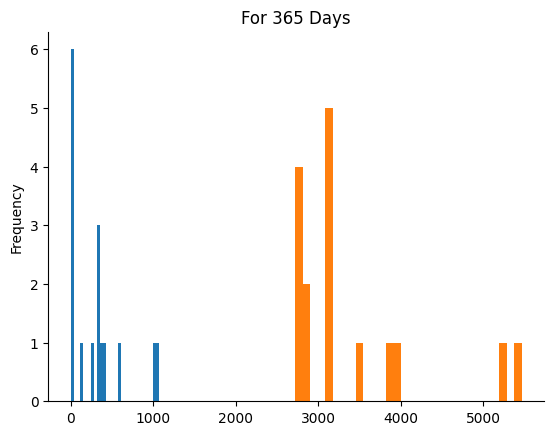

In [ ]:
from matplotlib import pyplot as plt
_df_0 = df.copy()
_df_0['Profit per customer'].plot(kind='hist', bins=30, title='Profit per customer')
plt.gca().spines[['top', 'right',]].set_visible(False)
_df_0['For 365 Days'].plot(kind='hist', bins=30, title='For 365 Days')
plt.gca().spines[['top', 'right',]].set_visible(False)

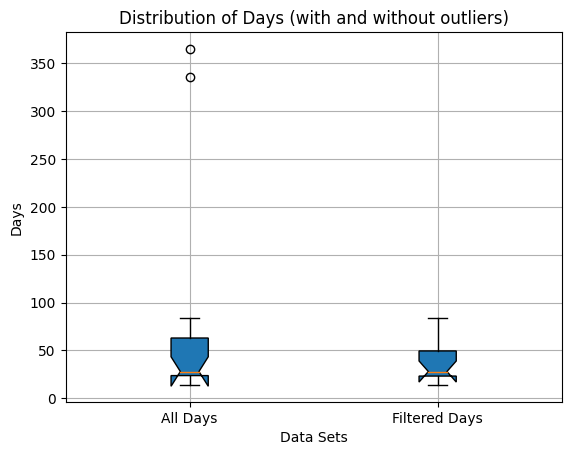

In [ ]:
# Identify and handle outliers (optional)
# You can define a threshold for outliers based on IQR (Interquartile Range)
q1 = df["Days"].quantile(0.25)
q3 = df["Days"].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Filter outliers (optional)
filtered_df = df[(df["Days"] >= lower_bound) & (df["Days"] <= upper_bound)]

# Create box plots
fig, ax = plt.subplots()  # Single subplot for both boxes

# Box plot for 'Days' (with or without outliers)
ax.boxplot([df["Days"], filtered_df["Days"] if len(filtered_df) > 0 else []],
           notch=True, vert=True, patch_artist=True, labels=["All Days", "Filtered Days"])

# Customize box plot appearance (optional)
ax.set_title("Distribution of Days (with and without outliers)")
ax.set_xlabel("Data Sets")
ax.set_ylabel("Days")
ax.grid(True)

# Display the boxplots
plt.show()

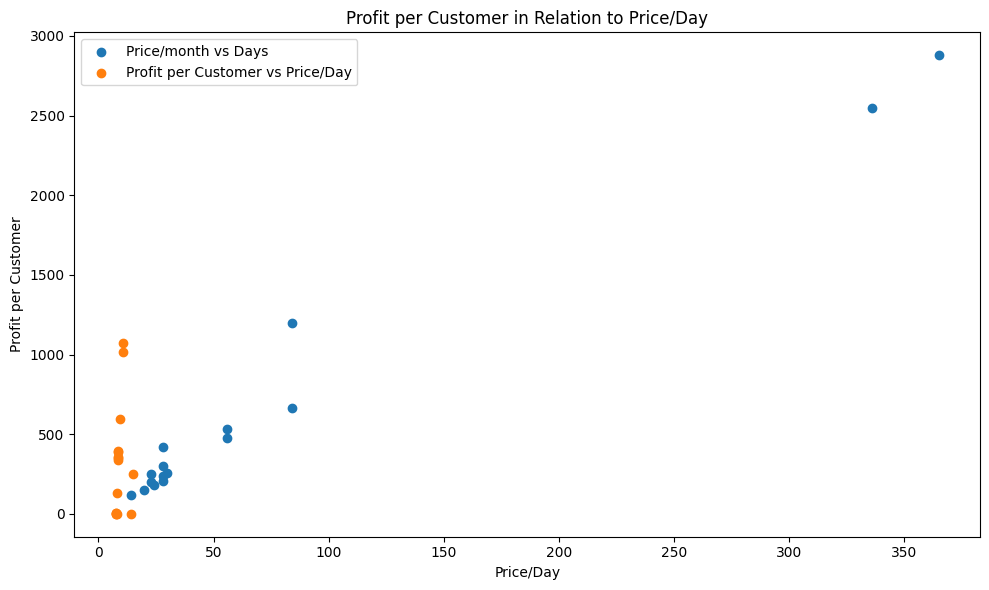

In [ ]:

# Scatter plots to explore relationships between features
plt.figure(figsize=(10, 6))  # Adjust figsize for better viewing
plt.scatter(df["Days"], df["Price/month"], label="Price/month vs Days")
plt.title("Price/month in Relation to Days")
plt.xlabel("Days")
plt.ylabel("Price/month")
plt.legend()

plt.scatter(df["Price/Day"], df["Profit per customer"], label="Profit per Customer vs Price/Day")
plt.title("Profit per Customer in Relation to Price/Day")
plt.xlabel("Price/Day")
plt.ylabel("Profit per Customer")
plt.legend()

# Tight layout for better spacing
plt.tight_layout()

# Display the visualizations
plt.show()
plt.show()

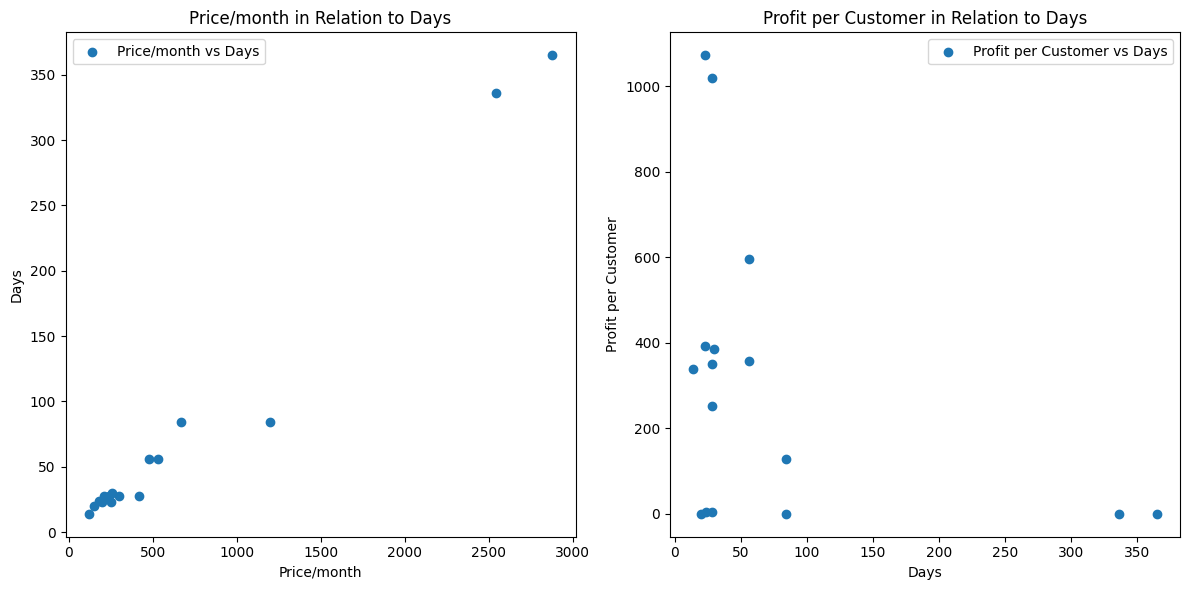

In [ ]:
plt.figure(figsize=(12, 6))  # Adjust figsize for better viewing

# Price vs Days
plt.subplot(1, 2, 1)  # First subplot (left)
plt.scatter(df["Price/month"], df["Days"], label="Price/month vs Days")
plt.title("Price/month in Relation to Days")
plt.xlabel("Price/month")
plt.ylabel("Days")
plt.legend()

# Days vs Profit per customer
plt.subplot(1, 2, 2)  # Second subplot (right)
plt.scatter(df["Days"], df["Profit per customer"], label="Profit per Customer vs Days")
plt.title("Profit per Customer in Relation to Days")
plt.xlabel("Days")
plt.ylabel("Profit per Customer")
plt.legend()

# Tight layout for better spacing
plt.tight_layout()

# Display the visualizations
plt.show()

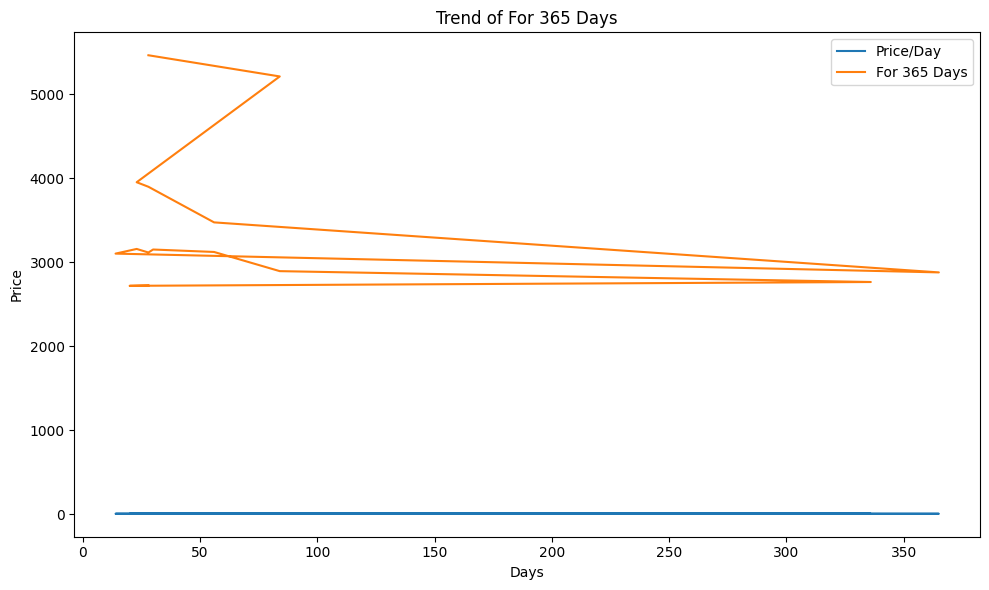

In [ ]:
# Create a figure for subplots (optional)
plt.figure(figsize=(10, 6))  # Adjust figsize for better viewing

# Line charts
plt.plot(df["Days"], df["Price/Day"], label="Price/Day")
plt.title("Trend of Price/Day")
plt.xlabel("Days")
plt.ylabel("Price/Day")
plt.legend()

plt.plot(df["Days"], df["For 365 Days"], label="For 365 Days")
plt.title("Trend of For 365 Days")
plt.xlabel("Days")
plt.ylabel("Price")  # Assuming "For 365 Days" represents a price
plt.legend()

# Tight layout for better spacing
plt.tight_layout()

In [ ]:
df1 = df.copy()
print(df1['Data_per_day'])

low = df1[df1['Data_per_day'] < 2]
medium = df1[df1['Data_per_day'] ==2]
high = df1[df1['Data_per_day'] ==3]

print("Category Low with Data per day lesser than 2 GB the count is:" , low.shape[0])
print("Category Medium with Data per day equal to 2 GB the count is:" , medium.shape[0])
print("Category High with Data per day equal to 3 GB the count is:" , high.shape[0])

0     1.0
1     1.0
2     1.0
3     1.5
4     1.5
5     1.5
6     1.5
7     1.5
8     1.5
9     1.5
10    2.0
11    2.0
12    2.0
13    2.0
14    3.0
15    3.0
Name: Data_per_day, dtype: float64
Category Low with Data per day lesser than 2 GB the count is: 10
Category Medium with Data per day equal to 2 GB the count is: 4
Category High with Data per day equal to 3 GB the count is: 2


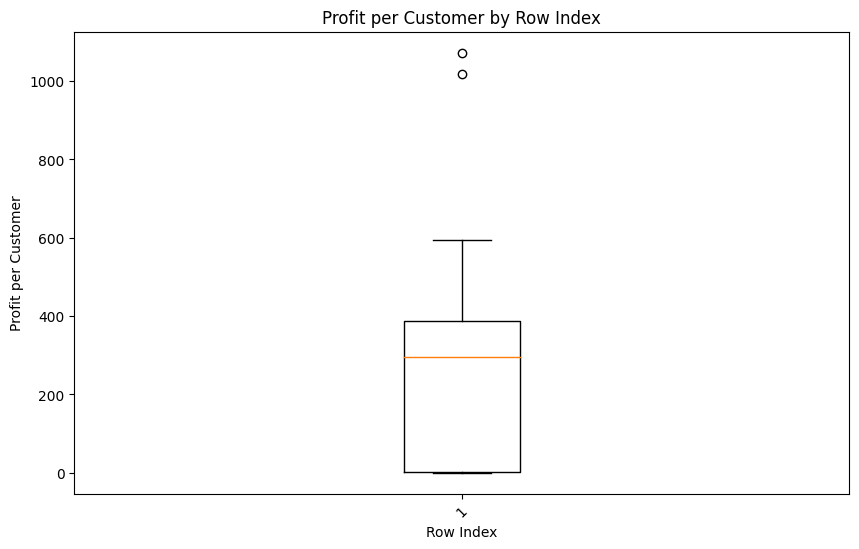

In [31]:
import matplotlib.pyplot as plt



plt.figure(figsize=(10, 6))
plt.boxplot(df1['Profit per customer'])  # Group by the entire DataFrame
plt.title("Profit per Customer by Row Index")
plt.xlabel("Row Index")  # Adjust label if necessary (e.g., "Customer ID")
plt.ylabel("Profit per Customer")
plt.xticks(rotation=45)  # Optional: Rotate x-axis labels for readability
plt.show()

In [38]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(df1[['Days', 'Price/Day', 'Data_per_day', 'Profit per customer']])

kmeans = KMeans(n_clusters=3, random_state=42)


kmeans.fit(scaled_features)

df1['Cluster'] = kmeans.labels_

cluster_centroids = scaler.inverse_transform(kmeans.cluster_centers_)
cluster_df = pd.DataFrame(cluster_centroids, columns=['Days', 'Price/Day', 'Data_per_day', 'Profit per customer'])
print("Cluster Centroids:")
print(cluster_df)

print("Inertia (within-cluster sum of squares):", kmeans.inertia_)

print("Cluster Sizes:")
print(df1['Cluster'].value_counts())

print("Original Data with Clusters:")
print(df1)

Cluster Centroids:
         Days  Price/Day  Data_per_day  Profit per customer
0  350.500000   7.731038      1.750000             0.000000
1   43.800000  12.052122      2.400000           587.648395
2   34.111111   8.130665      1.333333           218.170836
Inertia (within-cluster sum of squares): 21.197671419542097
Cluster Sizes:
Cluster
2    9
1    5
0    2
Name: count, dtype: int64
Original Data with Clusters:
    Days  Price/month  Price/Day  For 365 Days  Profit per customer  \
0     28          209   7.464286   2724.464286             5.214286   
1     24          179   7.458333   2722.291667             3.041667   
2     20          149   7.450000   2719.250000             0.000000   
3    336         2545   7.574405   2764.657738             0.000000   
4     84          666   7.928571   2893.928571           129.270833   
5     56          479   8.553571   3122.053571           357.395833   
6     30          259   8.633333   3151.166667           386.508929   
7     28      

<Axes: xlabel='Price/month'>

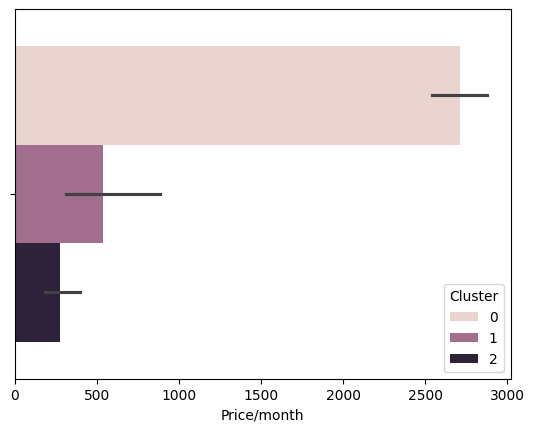

In [41]:
sns.barplot(x = 'Price/month', hue = 'Cluster', data = df1)

    Days  Price/month  Price/Day  For 365 Days  Profit per customer  \
0     28          209   7.464286   2724.464286             5.214286   
1     24          179   7.458333   2722.291667             3.041667   
2     20          149   7.450000   2719.250000             0.000000   
3    336         2545   7.574405   2764.657738             0.000000   
4     84          666   7.928571   2893.928571           129.270833   
5     56          479   8.553571   3122.053571           357.395833   
6     30          259   8.633333   3151.166667           386.508929   
7     28          239   8.535714   3115.535714           350.877976   
8     23          199   8.652174   3158.043478           393.385740   
9     14          119   8.500000   3102.500000           337.842262   
10   365         2879   7.887671   2879.000000             0.000000   
11    56          533   9.517857   3474.017857           595.017857   
12    28          299  10.678571   3897.678571          1018.678571   
13    

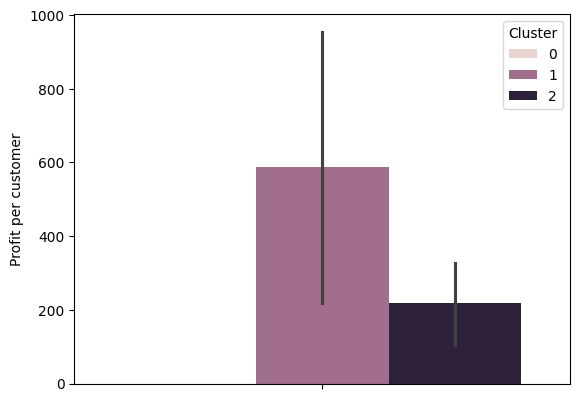

In [50]:
sns.barplot(y = 'Profit per customer', hue = 'Cluster',   data = df1)
print(df1.head(15))


In [55]:
Plan_Number =  [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
df1['Plan'] = Plan_Number
df1.head(16)

,Days,Price/month,Price/Day,For 365 Days,Profit per customer,Profit from 400 million users,Data_per_day,Cluster,Plan
0,28,209,7.464286,2724.464286,5.214286,2085.714286,1.0,2,0
1,24,179,7.458333,2722.291667,3.041667,1216.666667,1.0,2,1
2,20,149,7.450000,2719.250000,0.000000,0.000000,1.0,2,2
3,336,2545,7.574405,2764.657738,0.000000,0.000000,1.5,0,3
4,84,666,7.928571,2893.928571,129.270833,51708.333330,1.5,2,4
5,56,479,8.553571,3122.053571,357.395833,142958.333300,1.5,2,5
6,30,259,8.633333,3151.166667,386.508929,154603.571400,1.5,2,6
7,28,239,8.535714,3115.535714,350.877976,140351.190500,1.5,2,7
8,23,199,8.652174,3158.043478,393.385740,157354.296100,1.5,2,8
9,14,119,8.500000,3102.500000,337.842262,135136.904800,1.5,2,9


In [57]:
print(df1.groupby('Plan')['Profit per customer'].mean())

Plan
0        5.214286
1        3.041667
2        0.000000
3        0.000000
4      129.270833
5      357.395833
6      386.508929
7      350.877976
8      393.385740
9      337.842262
10       0.000000
11     595.017857
12    1018.678571
13    1072.521739
14       0.000000
15     252.023809
Name: Profit per customer, dtype: float64


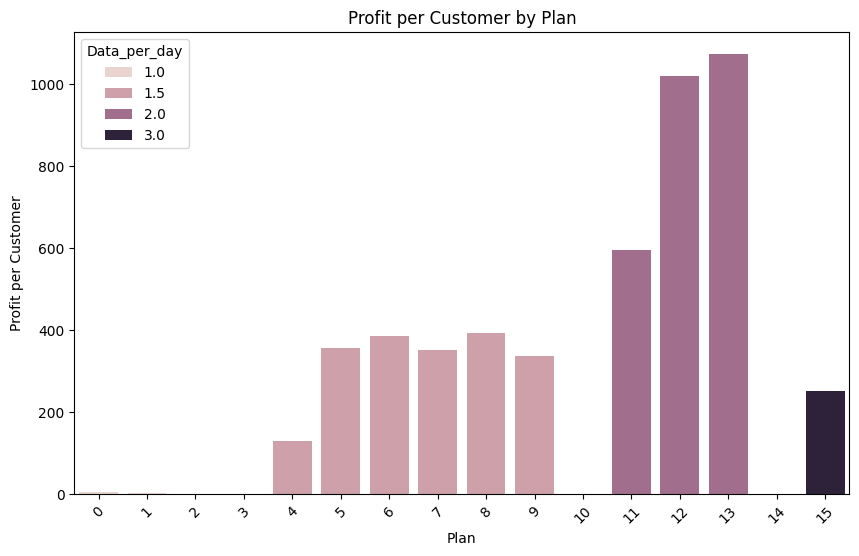

In [58]:
plt.figure(figsize=(10, 6))
sns.barplot(x = 'Plan',
            y = 'Profit per customer',
            hue = 'Data_per_day',
            data = df1)
plt.title("Profit per Customer by Plan")
plt.xlabel("Plan")
plt.ylabel("Profit per Customer")
plt.xticks(rotation=45)
plt.show()

In [63]:
correlation_coefficient = df1[['Price/month', 'Profit per customer']].corr()
print("\n Correlation Coefficient (Price/month vs. Profit per customer):", correlation_coefficient)


 Correlation Coefficient (Price/month vs. Profit per customer):                      Price/month  Profit per customer
Price/month             1.000000            -0.387809
Profit per customer    -0.387809             1.000000


In [65]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier


In [64]:
df1['Churn'] = [1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0]

In [72]:
df1.loc[df1['Profit from 400 million users']== 0]

,Days,Price/month,Price/Day,For 365 Days,Profit per customer,Profit from 400 million users,Data_per_day,Cluster,Plan,Churn
2,20,149,7.450000,2719.250000,0.0,0.0,1.0,2,2,1
3,336,2545,7.574405,2764.657738,0.0,0.0,1.5,0,3,0
10,365,2879,7.887671,2879.000000,0.0,0.0,2.0,0,10,1
14,84,1199,14.273810,5209.940476,0.0,0.0,3.0,1,14,1


In [73]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.preprocessing import StandardScaler  # Optional for scaling


features = ['Days', 'Profit per customer', 'Price/Day', 'Data_per_day']

# Split data (adjust test size based on your needs)
X_train, X_test, y_train, y_test = train_test_split(df1[features],
                                                    df1['Churn'],
                                                    test_size=0.2, random_state=42)

# Feature scaling (optional, based on model choice)
use_scaling = True  # Set to False if not using scaling

if use_scaling:
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
else:
    X_train_scaled = X_train
    X_test_scaled = X_test

# Model training and evaluation
models = [LogisticRegression(), DecisionTreeClassifier(), RandomForestClassifier()]
model_names = ["Logistic Regression", "Decision Tree", "Random Forest"]

for model, name in zip(models, model_names):
    model.fit(X_train_scaled if use_scaling else X_train, y_train)
    y_pred = model.predict(X_test_scaled if use_scaling else X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)

    print(f"\n**{name} Results:**")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"ROC-AUC: {roc_auc:.4f}")


**Logistic Regression Results:**
Accuracy: 0.2500
Precision: 0.3333
Recall: 0.5000
ROC-AUC: 0.2500

**Decision Tree Results:**
Accuracy: 0.2500
Precision: 0.0000
Recall: 0.0000
ROC-AUC: 0.2500

**Random Forest Results:**
Accuracy: 0.5000
Precision: 0.5000
Recall: 0.5000
ROC-AUC: 0.5000


KeyError: 'target_variable'